In [2]:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Business Understanding
- 통신사 고객 관리
- 고객의 인원수가 가장 중요함
- 기존 고객 이탈 방지, 신규 고객 유치
- 고객 이탈과 가장 관련 있는 요인이 무엇인지 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
df.sort_values(by='TotalCharges')['TotalCharges']  # 숫치형 데이터가 아닌것이 존재함.

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [8]:
df.sort_values(by='TotalCharges')['TotalCharges'][936] # 빈칸 확인

' '

In [9]:
df.loc[df['TotalCharges'] == ' ']['TotalCharges']  # 빈칸 찾기

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [10]:
len(df.loc[df['TotalCharges'] == ' ']['TotalCharges'])

11

### 빈 값 처리 방법
- 그냥 지우기
- 도메인 지식을 이용해 채워 넣기
- 평균 대체법

In [ ]:
df.loc[df['TotalCharges'] == ' ']    # 이렇게 처리하면 안됨

### 빈 값 처리 방법
- 그냥 지우기
- 도메인 지식을 이용해 채워 넣기
- 평균 대체법
- 해당 column을 label로 두고, ML 학습한 후 예측값으로 빈값을 채워 넣기

In [11]:
df['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [12]:
# Dependents는 대표성이 있는가 ?
# 부양 가족이 있는 고객은 모두 TotalCharges가 빈칸인가 ?

df.loc[df['Dependents'] == 'Yes']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [13]:
len(df.loc[df['Dependents'] == 'Yes'])

2110

In [14]:
# tenure는 대표성이 있는가 ?

df.loc[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# 가입한지 0개월
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x)) # object type -> folat type으로 변경
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
set(df['Churn'])

{'No', 'Yes'}

In [17]:
mapper = {
    'Yes': 1, 
    'No': 0
}

In [18]:
df['Churn_num'] = df['Churn'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [19]:
len(set(df['tenure']))

73

In [20]:
# 평균값으로 대체
te_ch = df.groupby('tenure').agg({'Churn_num': 'mean'}).reset_index()
te_ch

,tenure,Churn_num
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591
...,...,...
68,68,0.090000
69,69,0.084211
70,70,0.092437
71,71,0.035294


In [21]:
import seaborn as sns

<Axes: xlabel='tenure', ylabel='Churn_num'>

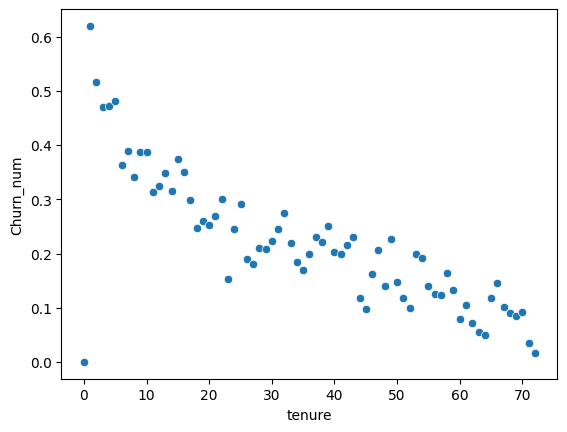

In [22]:
sns.scatterplot(data=te_ch, x='tenure', y='Churn_num')

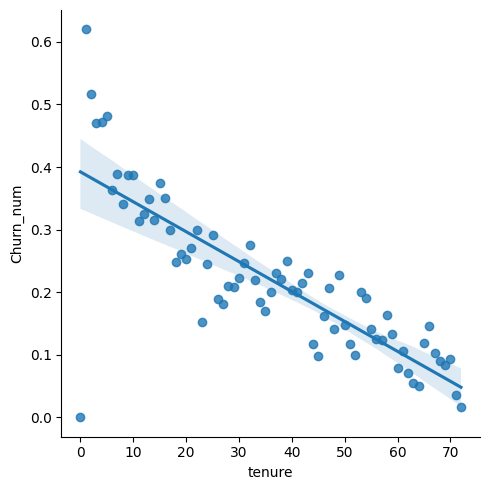

In [23]:
sns.lmplot(data=te_ch, x='tenure', y='Churn_num')  # 산점도 추세선 그래프

고객 이탈(Churn)과 고객 유지 기간(tenure) 사이의 관계를 시각화한 회귀 그래프
1. 축 설명
- X축 (tenure): 고객이 서비스를 이용한 기간 (단위는 월로 추정)
- Y축 (Churn_num): 고객 이탈 비율 또는 이탈 여부를 수치화한 값

2. 그래프 해석
- 전반적으로 **tenure(고객 유지 기간)**가 길수록 **Churn_num(이탈 비율)**이 낮아지는 경향이 있음
- 파란 선은 선형 회귀선이며, 데이터의 전반적인 추세(음의 상관관계)를 보임
- 그림자 영역은 회귀선의 신뢰 구간(Confidence Interval)을 나타냄

3. 의미 요약
- 고객이 서비스를 오래 이용할수록 이탈 가능성이 낮아지고 있음
- 즉, 신규 고객일수록 이탈 위험이 높고, 장기 고객은 더 안정적임

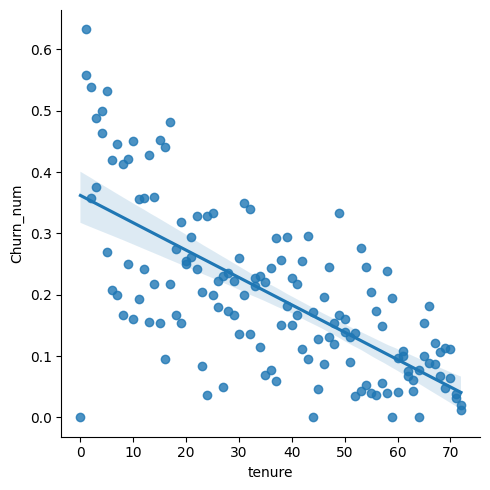

In [24]:
te_ch = df.groupby(['tenure', 'Dependents']).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num')  # 산점도 추세선 그래프

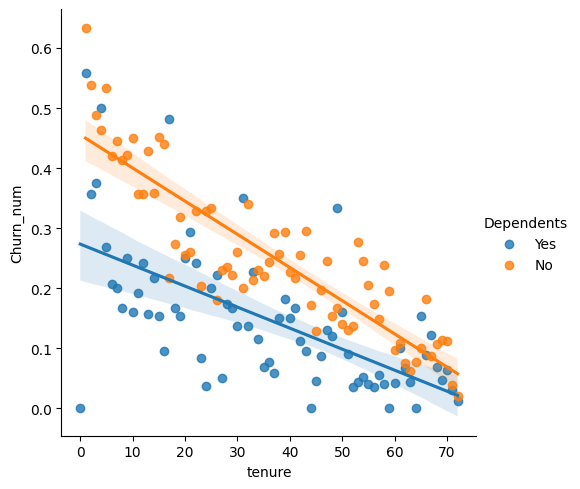

In [25]:
hue = 'Dependents'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

고객의 **의존자 여부(Dependents)**에 따라 **고객 유지 기간(tenure)**과 이탈률(Churn_num) 간의 관계를 분리해서 보여주는 이중 회귀 분석 그래프
1. 축 설명 및 변수
- X축 (tenure): 고객이 서비스를 이용한 개월 수
- Y축 (Churn_num): 고객 이탈 비율 (0~1 사이 값으로 추정됨)
- 색상: 고객이 **의존자(부양가족)**가 있는지 여부
- 파란색 (Yes): 의존자가 있는 고객
- 주황색 (No): 의존자가 없는 고객
2. 그래프 상세 해석
- 공통 경향성
    - 두 그룹 모두 tenure가 길어질수록 Churn_num이 낮아지는 음의 상관관계를 보입니다.
    - 즉, 고객이 서비스를 오래 이용할수록 이탈할 가능성이 낮아집니다 (이건 첫 번째 그래프와 같은 추세).
3. 의존자 여부에 따른 차이

| 구분                      | 이탈률 수준       | 회귀선 기울기     | 신뢰 구간               |
|---------------------------|-------------------|-------------------|--------------------------|
| 의존자 있음 (Yes, 파란색) | 전반적으로 낮음   | 완만하게 감소     | 신뢰 구간 좁고 안정적   |
| 의존자 없음 (No, 주황색) | 전반적으로 높음   | 가파르게 감소     | 신뢰 구간 넓음          |

- 해석 요점:
    - 의존자가 없는 고객은 초기에 이탈률이 높고, 시간이 지날수록 빠르게 떨어짐.
    - 반대로, 의존자가 있는 고객은 초기 이탈률도 낮고, 점진적으로 안정적인 유지 경향을 보입니다.

이는 의존자가 있는 고객이 서비스에 더 오래 머물 가능성이 높다는 것을 의미할 수 있습니다. 가족 요인으로 인해 서비스 안정성이 중요하기 때문일 수 있습니다.

3. 비즈니스 관점 인사이트
- 이탈 방지 전략:
    - 의존자가 없는 신규 고객은 이탈 가능성이 매우 높으므로, 초기에 적극적인 케어와 혜택 제공이 필요합니다.
    - 의존자가 있는 고객은 충성도 높은 장기 고객으로 발전할 가능성이 높으므로, 장기 혜택/패키지 제공이 효과적입니다.

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

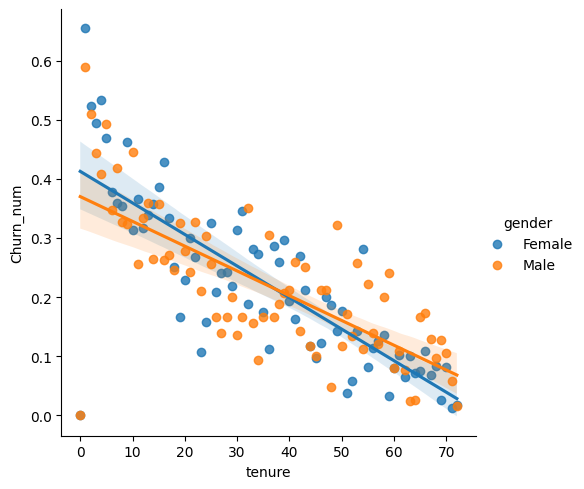

In [27]:
hue = 'gender'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

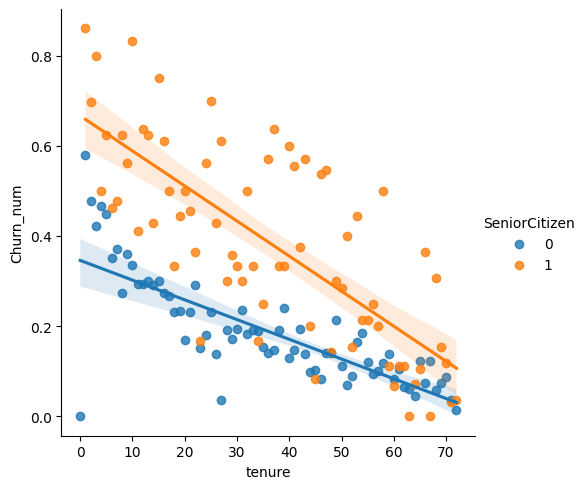

In [28]:
hue = 'SeniorCitizen'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

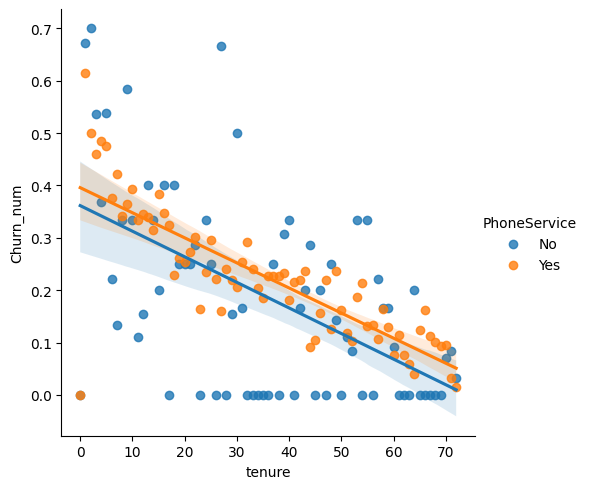

In [29]:
hue = 'PhoneService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

In [30]:
df.loc[df['tenure'] == 32]['PhoneService']

107      No
174     Yes
253     Yes
306     Yes
340     Yes
       ... 
6420    Yes
6440    Yes
6822    Yes
6881     No
6949     No
Name: PhoneService, Length: 69, dtype: object

In [31]:
df.loc[df['tenure'] == 32]['PhoneService'].value_counts()

PhoneService
Yes    65
No      4
Name: count, dtype: int64

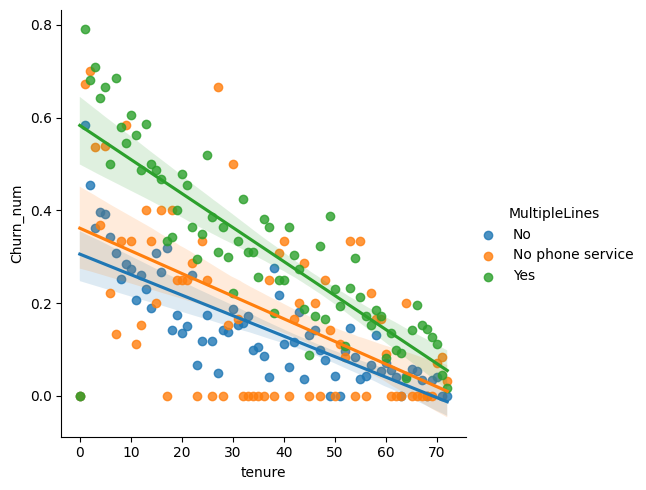

In [32]:
hue = 'MultipleLines'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

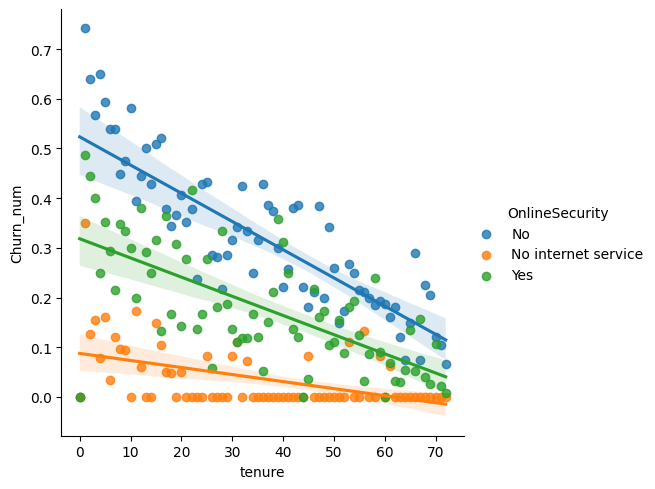

In [33]:
hue = 'OnlineSecurity'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

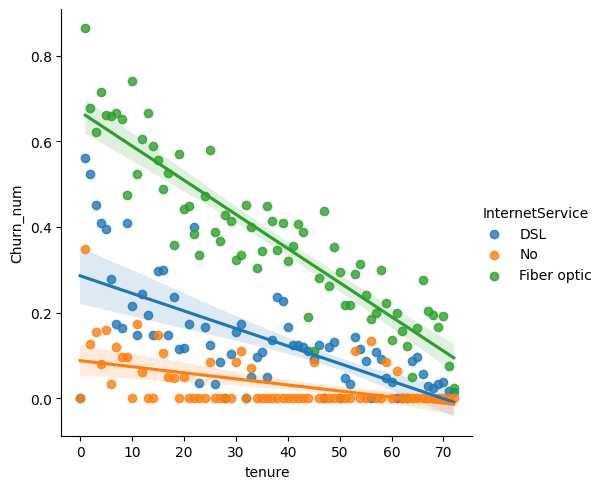

In [34]:
hue = 'InternetService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

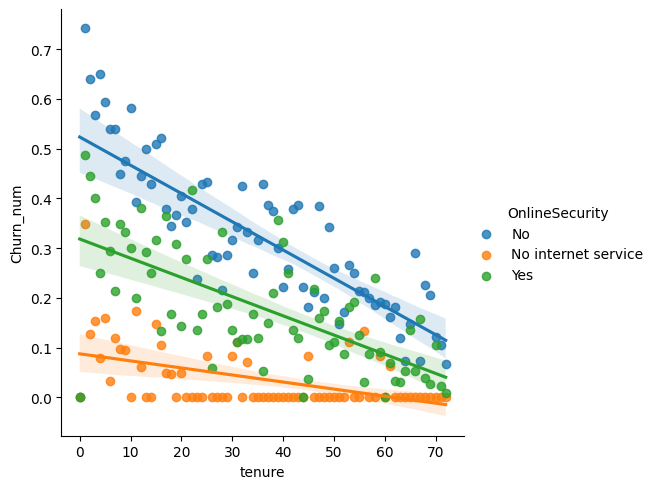

In [35]:
hue = 'OnlineSecurity'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

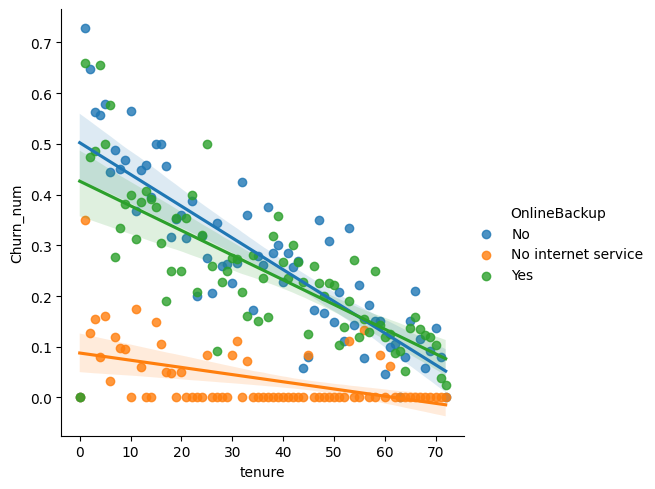

In [36]:
hue = 'OnlineBackup'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

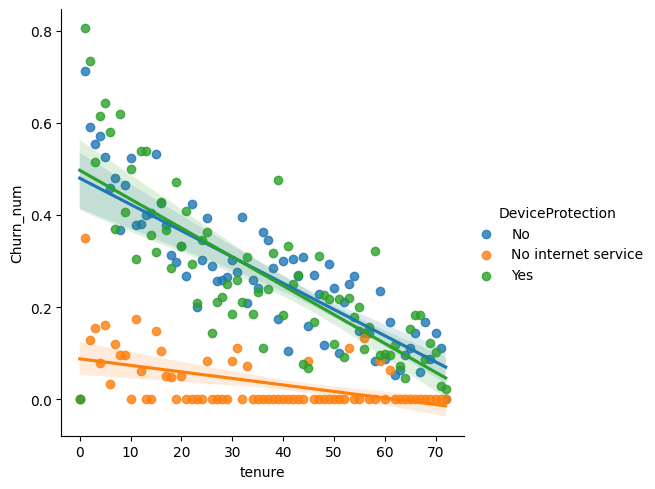

In [37]:
hue = 'DeviceProtection'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

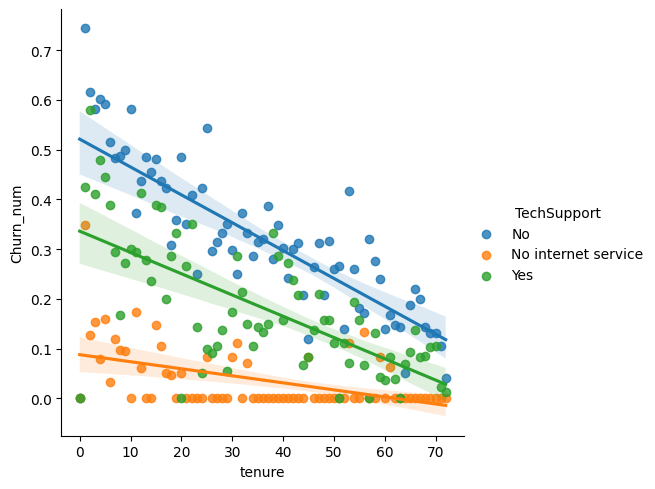

In [38]:
hue = 'TechSupport'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

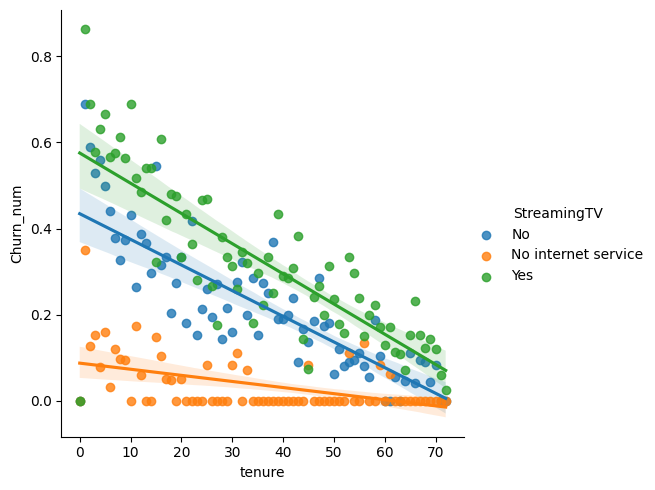

In [39]:
hue = 'StreamingTV'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

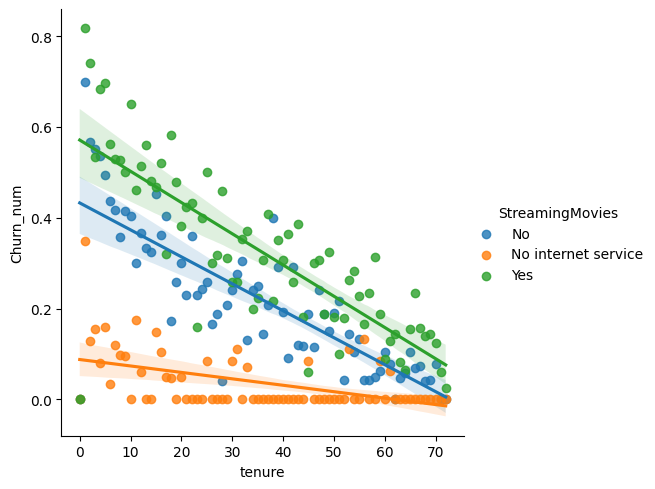

In [40]:
hue = 'StreamingMovies'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

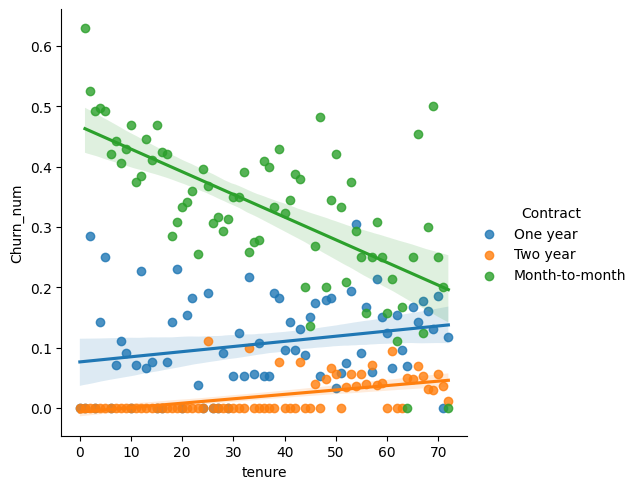

In [41]:
hue = 'Contract'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

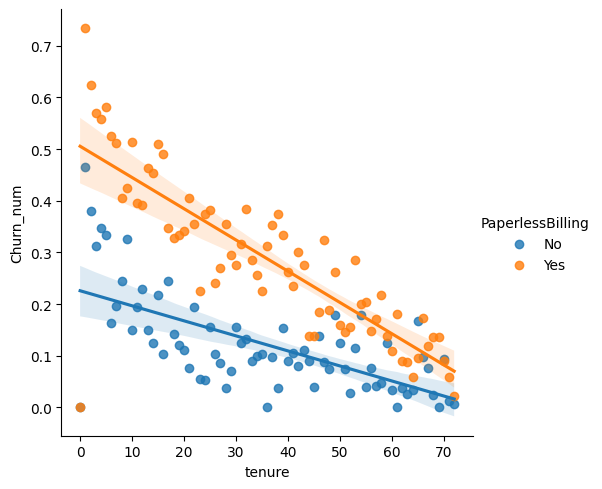

In [42]:
hue = 'PaperlessBilling'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

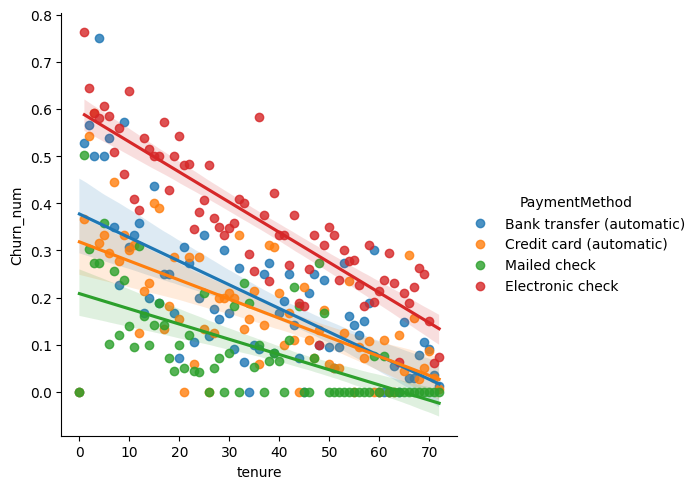

In [44]:
hue = 'PaymentMethod'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

### Data Preparation
- 이상치 판별과 처리
- scaling : 범위를 조정 
- 경우의 수 column 처리
- 교차 검증 

### 이상치 (Outlier)
- 기준을 정해서 기준선 밖에 잇으면 이상치로 판단
- IQR(inter Quartile Range), MAD, MCOD, Hoteling's T2, SPE  : MAD, MCOD, Hoteling's T2, SPE 난이도가 있음

In [ ]:
df.describe()

In [45]:
tgt_col = 'TotalCharges'
desc = df.describe()[tgt_col]

In [46]:
desc

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [48]:
# IQR은 사분위수 범위를 기반 이상치를 탐지하기 위한 상한선과 하한선을 구하는 과정
IQR = 1.5 * (desc['75%'] - desc['25%'])   # 1.5는 학술적인 상수
upper_lim = desc['75%']  + IQR # 상한선
lower_lim = desc['25%'] - IQR # 하한선


# IQR (Interquartile Range, 사분위수 범위)
# IQR=Q3−Q1
# 데이터의 "중간 50%"가 차지하는 범위
# 중앙에 집중된 값들의 폭
# 1.5 × IQR을 기준으로 벗어나는 값을 이상치로 간주하는 건 통계적으로 널리 쓰이는 규칙
# 상한선 하한선 범위를 벗어나면 이상치로 판단 가능

In [ ]:
upper_lim

np.float64(-4683.525)

In [52]:
df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim)] # 이상치 확인

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num


In [53]:
tgt_col = 'SeniorCitizen'
desc = df.describe()[tgt_col]

IQR = 1.5 * (desc['75%'] - desc['25%'])   # 1.5는 학술적인 상수
upper_lim = desc['75%'] + IQR
lower_lim = desc['25%'] - IQR

df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim)]  # 이상치 확인

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No,0
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,0
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,0
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No,0
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,0
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No,0
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1


In [54]:
# TotalCharge를 대상으로 평균으로부터 표준편차 2.5에 해당하는 값들의 합

tgt_col = 'TotalCharges'
desc = df.describe()[tgt_col]

upper_lim = desc['mean'] + (2.5 * desc['std']) 
lower_lim = desc['mean'] - (2.5 * desc['std']) 

sum(df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim)][tgt_col])  

740692.15

### scaling
- 변수의 범위를 조정해주는 것
- 단위가 큰 column이 단위가 작은 column에 비해 학습 단계에 미치는 영향이 큰 경우
- 그래프를 그릴때, 같은 축을 공유해 시각화 하는 경우
- 자릿수가 작아야 속도가 빠른 경우

- min-max > standart > robust  : 이상치를 고려하지 않음. 이상치가 있는 경우 min-max를 추천하지 않음
- robust는 이상치의 영향을 덜 받음.

In [55]:
minus_min = df['tenure'] - min(df['tenure'])
minus_min.min()

np.int64(0)

In [ ]:
# 정규화하는 단계
scaled = minus_min / max(minus_min)
scaled.describe()

count    7043.000000
mean        0.449599
std         0.341104
min         0.000000
25%         0.125000
50%         0.402778
75%         0.763889
max         1.000000
Name: tenure, dtype: float64

In [57]:
# tenure, MonthlyCharges, TotalCharges
# tenure_mm_scal, MonthlyCharges_mm_scal, TotalCharges_mm_scal

scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_cols:
    minus_min = df[tgt_col] - min(df[tgt_col])
    df[tgt_col + '_mm_scal'] = minus_min / max(minus_min)

df[['tenure_mm_scal', 'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal']].describe()

,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


In [58]:
import numpy as np

In [59]:
scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_cols:
    minus_mean = df[tgt_col] - np.mean(df[tgt_col])
    df[tgt_col + '_std_scal'] = minus_mean / np.std(minus_min)

df[['tenure_std_scal', 'MonthlyCharges_std_scal', 'TotalCharges_std_scal']].describe()

,tenure_std_scal,MonthlyCharges_std_scal,TotalCharges_std_scal
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-1.379306e-19,-8.827558e-19,-3.783239e-17
std,1.083522e-02,1.327521e-02,1.000071e+00
min,-1.428160e-02,-2.052016e-02,-1.005780e+00
25%,-1.031095e-02,-1.290976e-02,-8.299464e-01
50%,-1.487293e-03,2.465466e-03,-3.905282e-01
75%,9.983463e-03,1.106853e-02,6.648034e-01
max,1.748357e-02,2.381872e-02,2.825806e+00
